In [317]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [318]:
# Cargar datasets
train_reviews = pd.read_csv("../data/train_reviews.csv")
test_reviews = pd.read_csv("../data/test_reviews.csv")
usuarios = pd.read_csv("../data/usuarios.csv")
negocios = pd.read_csv("../data/negocios.csv")

C:\Users\aleja\AppData\Local\Temp\ipykernel_21152\2779904179.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  usuarios = pd.read_csv("../data/usuarios.csv")


In [319]:
train_reviews.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
929072,VjaQ5KxWaMNXG7zO46VIAQ,1Jd-TEdaVbwqOwYCMWakgw,9DUV6nau5YEAECh0djF2tg,4.0,1,0,1,I've been to this place 4 times. The first tim...,2012-07-29 17:21:36
107274,Ff6cVW8CUxoqEg0iYC_Jig,KiEzI8Q70lIzCNpr0HRRzA,uQnOVqRRLALRNy-kdu1LXQ,5.0,0,1,1,YES to the service. YES to the flavors. YES t...,2013-08-12 23:35:02
769589,4CxmiUvdyn-jz-GW5duiug,DvMG8w8dM0MCrQV0pfAA5g,Ge00ikbJsoSxuo8AcDCgOQ,4.0,0,0,0,Good food but kind of slow service. I went in ...,2015-07-10 22:13:20
458149,hOImbinXhkkxpc6ap4f9gg,12p4KlIiRBf4nYwwsdXpug,1Vl6Rg52SvXYqEcc-I0I2g,3.0,1,0,0,Sigh. This 3 stars is actually being a bit gen...,2018-07-24 03:10:11
132872,H_8kV4b9_Zr8wzIB9ExXHQ,Khe-fzQpJ0xPlPwFckBjHA,W4ZEKkva9HpAdZG88juwyQ,5.0,4,1,3,Part of the Brennan's Restaurant group and in ...,2020-12-13 22:03:18


In [320]:
train_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Usuario

In [321]:
usuarios.sample(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
32618,WwulXySQN8t2hwqH_yWurA,Niki,1512,2014-12-15 03:33:23,12130,1789,8456,"2015,2016,2017,2018,2019,20,20,2021","sYYbJ6gURyTXlmg3Lsy1kw, RImQO5EF2zmPnnGn7c_6Tw...",1746,4.59,383,56,3,4,1,913,11869,914,914,148,236
4256,071Tcwq8ZcDVVv0Emu4xnw,A,44,2009-03-26 04:37:01,30,7,14,NaN,"Fo26aP-LkMIFqmmoUAyfKg, UbbpCL6zF8aneYifJtOA_A...",3,4.63,0,1,0,0,0,0,0,0,0,0,0
316112,dGzj2ngpszFYBZbF9LaURw,Rebecca,28,2009-06-01 22:18:27,40,17,22,NaN,"V0IG74yzYh7Q057yfTJBBw, CFczJ6RLg3_QZvPtWhzD0g...",5,4.20,0,1,0,0,0,0,0,0,0,1,0
407803,W69DFbqFZgY5eWu5v9EBWQ,Alex,10,2009-05-25 22:11:19,12,8,3,NaN,"KfYR78sx1IfMAuMF0QY5UQ, _gPIM_U4kihKUIjSEB9lYg...",1,3.09,0,0,0,0,0,0,0,0,0,0,0
418588,GkluO_37vQXG2pmOwv65NQ,Francis,37,2015-03-16 14:31:41,27,8,7,NaN,"nsS-xg9bYaD4wWRhjy7DAw, Op9ON0dGk8G9HBUx2pE86g...",0,4.41,0,0,0,0,0,0,1,0,0,0,0


In [322]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699619 entries, 0 to 699618
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             699619 non-null  object 
 1   name                699607 non-null  object 
 2   review_count        699619 non-null  int64  
 3   yelping_since       699619 non-null  object 
 4   useful              699619 non-null  int64  
 5   funny               699619 non-null  int64  
 6   cool                699619 non-null  int64  
 7   elite               55411 non-null   object 
 8   friends             427407 non-null  object 
 9   fans                699619 non-null  int64  
 10  average_stars       699619 non-null  float64
 11  compliment_hot      699619 non-null  int64  
 12  compliment_more     699619 non-null  int64  
 13  compliment_profile  699619 non-null  int64  
 14  compliment_cute     699619 non-null  int64  
 15  compliment_list     699619 non-nul

In [323]:
for col in usuarios.columns:
    print(usuarios[col].value_counts())

user_id
qVc8ODYU5SZjKXVBgXdI7w    1
iA1B6ah5sCh7jEwj6Ai95w    1
Y8MQz8P697xRyIGaEe4yKg    1
LQBe62Qq3cvLqsGJaEF5Rw    1
TC4aD5qZtE5oc72sSvwfOg    1
                         ..
SUokZE-eIboa2-GrO9rZVg    1
kjrFvGQnQwOWiA5u5XskHA    1
4LLGhrsgy65kcpIuiVEgmg    1
M2zqfnBr2EUI28y8aVRGng    1
wL5jPrLRVCK_Pmo4lM1zpA    1
Name: count, Length: 699619, dtype: int64
name
John       6435
Michael    5849
David      5611
Chris      5289
Mike       4795
           ... 
A Kate        1
Vil           1
Bethani       1
Efa           1
Gwendy        1
Name: count, Length: 61409, dtype: int64
review_count
1       68946
2       59690
3       51296
4       42746
5       35944
        ...  
1597        1
1375        1
1895        1
1017        1
2030        1
Name: count, Length: 1924, dtype: int64
yelping_since
2019-03-05 00:10:27    3
2015-07-08 23:52:22    2
2011-12-30 15:36:34    2
2014-07-03 19:01:30    2
2018-01-02 23:24:32    2
                      ..
2011-03-06 18:49:18    1
2009-06-05 04:34:16    1

In [324]:
usuarios.isnull().sum()

user_id                    0
name                      12
review_count               0
yelping_since              0
useful                     0
funny                      0
cool                       0
elite                 644208
friends               272212
fans                       0
average_stars              0
compliment_hot             0
compliment_more            0
compliment_profile         0
compliment_cute            0
compliment_list            0
compliment_note            0
compliment_plain           0
compliment_cool            0
compliment_funny           0
compliment_writer          0
compliment_photos          0
dtype: int64

In [325]:
new_usuarios = usuarios.drop(columns=["elite", "friends", "name"]) # ?
new_usuarios.columns

Index(['user_id', 'review_count', 'yelping_since', 'useful', 'funny', 'cool',
       'fans', 'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos'],
      dtype='object')

In [326]:
from sklearn.preprocessing import StandardScaler

compliment_cols = [col for col in new_usuarios.columns if col.startswith("compliment_")]

scaler = StandardScaler()

new_usuarios[compliment_cols] = scaler.fit_transform(new_usuarios[compliment_cols])

new_usuarios[compliment_cols].describe()

,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05
mean,-9.831142e-18,4.874946e-19,-4.783541e-18,8.937402e-19,1.046082e-18,6.845237e-18,2.884343e-18,1.340610e-18,1.340610e-18,1.629045e-17,-2.112477e-18
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.189654e-02,-2.638549e-02,-1.460309e-02,-1.342202e-02,-7.924963e-03,-2.843689e-02,-3.237663e-02,-3.872763e-02,-3.872763e-02,-4.267435e-02,-1.664385e-02
25%,-3.189654e-02,-2.638549e-02,-1.460309e-02,-1.342202e-02,-7.924963e-03,-2.843689e-02,-3.237663e-02,-3.872763e-02,-3.872763e-02,-4.267435e-02,-1.664385e-02
50%,-3.189654e-02,-2.638549e-02,-1.460309e-02,-1.342202e-02,-7.924963e-03,-2.843689e-02,-3.237663e-02,-3.872763e-02,-3.872763e-02,-4.267435e-02,-1.664385e-02
75%,-3.189654e-02,-2.638549e-02,-1.460309e-02,-1.342202e-02,-7.924963e-03,-2.843689e-02,-3.237663e-02,-3.872763e-02,-3.872763e-02,-4.267435e-02,-1.664385e-02
max,2.346407e+02,6.679597e+02,5.935675e+02,7.479935e+02,7.710087e+02,6.046666e+02,5.502222e+02,3.527474e+02,3.527474e+02,3.314541e+02,5.554265e+02


In [327]:
from sklearn.preprocessing import StandardScaler

compliment_cols = ["review_count", "useful", "funny", "cool", "fans"]

scaler = StandardScaler()

new_usuarios[compliment_cols] = scaler.fit_transform(new_usuarios[compliment_cols])

new_usuarios[compliment_cols].describe()

,review_count,useful,funny,cool,fans
count,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05
mean,-1.592482e-17,-5.281192e-19,3.412462e-18,-1.425922e-17,3.412462e-18
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.047548e-01,-7.761433e-02,-5.155727e-02,-5.326116e-02,-9.224837e-02
25%,-2.801503e-01,-7.661663e-02,-5.155727e-02,-5.326116e-02,-9.224837e-02
50%,-2.309414e-01,-7.262584e-02,-4.996237e-02,-5.212889e-02,-9.224837e-02
75%,-9.151607e-02,-5.566497e-02,-4.517766e-02,-4.759982e-02,-5.714961e-02
max,1.429998e+02,2.057435e+02,2.963183e+02,2.262622e+02,4.385369e+02


In [328]:
new_usuarios['yelping_since'] = pd.to_datetime(usuarios['yelping_since'], errors='coerce')

new_usuarios['yelping_since'] = new_usuarios['yelping_since'].dt.year

new_usuarios['yelping_since'].value_counts()

yelping_since
2015    86327
2014    84032
2013    77842
2012    74207
2016    72077
2011    67727
2017    48702
2010    43511
2018    41295
2019    30608
2009    26512
2020    13342
2008    13234
2021    10252
2007     6502
2006     2407
2022      586
2005      424
2004       32
Name: count, dtype: int64

In [329]:
new_usuarios.sample(5)

,user_id,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
642313,Ll3nta5ku08T-LwABXe-_A,-0.280150,2019,-0.077614,-0.051557,-0.053261,-0.092248,5.00,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.028437,-0.032377,-0.038728,-0.038728,-0.042674,-0.016644
62306,b9Jtjx9rzujquDBL3miwPA,-0.247344,2015,-0.077614,-0.051557,-0.053261,-0.092248,4.57,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.028437,-0.032377,-0.038728,-0.038728,-0.042674,-0.016644
98966,FIBBcVUOZiEXo93gnRoNVQ,-0.247344,2016,-0.076617,-0.049962,-0.053261,-0.092248,2.29,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.028437,-0.032377,-0.038728,-0.038728,-0.042674,-0.016644
266028,4a7rN9hy5OPPNxEz0kshKQ,-0.222740,2014,-0.071628,-0.051557,-0.053261,-0.057150,3.90,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.028437,-0.032377,-0.038728,-0.038728,-0.042674,-0.016644
636001,B16eQgNGC2tViBb5JMH2iQ,-0.296553,2020,-0.077614,-0.051557,-0.053261,-0.092248,1.00,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.028437,-0.032377,-0.038728,-0.038728,-0.042674,-0.016644


## Negocio

In [330]:
negocios.sample(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
18902,0iEZSvu05E18sUHg2e4MXQ,The Athletic Studio/TAS CrossFit,1707 W North A St,Tampa,FL,33606,27.946096,-82.477454,5.0,6,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Interval Training Gyms, Boot Camps, Yoga, Acti...","{'Monday': '16:30-20:0', 'Tuesday': '16:30-20:..."
22587,XQSHEl2PVPmbpIKks7BqNA,Planet Fitness,5239 E Thompson Rd,Indianapolis,IN,46237,39.693344,-86.079030,4.0,36,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Gyms, Trainers, Fitness & Instruction, Active ...","{'Monday': '5:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
2593,SzIxeQzrATYbL8IFjaKXgg,Porfirio’s Pizza & Past,946 E BRISTOL RD,Lower Southampton Township,PA,19053,40.152685,-74.965388,3.5,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Restaurants, Pizza","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
28129,9lorWfwaiGmELokJ39ZGHg,Cali Nails,84 999 Fir Street,Sherwood Park,AB,T8A 4N5,53.513238,-113.320982,2.5,5,1,"{'BusinessParking': ""{'garage': False, 'street...","Nail Salons, Beauty & Spas","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
20932,JgSysePfuL68hBo4wBEWvg,Murphy's On 21,13226 Tesson Ferry Rd,Saint Louis,MO,63128,38.486472,-90.382385,3.5,18,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","American (Traditional), Pubs, Delis, Bars, Piz...","{'Monday': '15:30-1:0', 'Tuesday': '15:30-1:0'..."


In [331]:
negocios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30069 entries, 0 to 30068
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   30069 non-null  object 
 1   name          30069 non-null  object 
 2   address       29068 non-null  object 
 3   city          30069 non-null  object 
 4   state         30069 non-null  object 
 5   postal_code   30057 non-null  object 
 6   latitude      30069 non-null  float64
 7   longitude     30069 non-null  float64
 8   stars         30069 non-null  float64
 9   review_count  30069 non-null  int64  
 10  is_open       30069 non-null  int64  
 11  attributes    27300 non-null  object 
 12  categories    30052 non-null  object 
 13  hours         25381 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.2+ MB


In [332]:
for col in negocios.columns:
    print(negocios[col].value_counts())

business_id
GDEEPQdYs2utMN-R4znZSA    1
zi23F23_8ao4Gz1Ecj5ywA    1
ldPcDAa_u66jQINDlutTsQ    1
9SP-J_N2DV_Dodg1VxnXoQ    1
HF9LX5776QYYK70tyIL8gw    1
                         ..
d-2fDzziIxhbDn3tzH9GTg    1
-muLz726oAXME0r6nAm4WA    1
Qp5m70lC2KorILVRdpeR0g    1
ul97zyH40F8OMTwRIgJqDQ    1
5mDnmxXBbVuNagxyyNENoQ    1
Name: count, Length: 30069, dtype: int64
name
McDonald's              158
Starbucks               143
Dunkin'                 102
Walgreens                89
Subway                   87
                       ... 
GA Foods                  1
Fuzzy's Taco Shop         1
Tampa Tattoo              1
Reno Buggie Barn          1
Old Cedar Campground      1
Name: count, Length: 25117, dtype: int64
address
160 N Gulph Rd                    20
51 N 12th St                      16
1 Terminal Dr                     10
2223 N Westshore Blvd             10
6901 22nd Ave N                    8
                                  ..
2815 Lebanon Pike                  1
123 Nutt Rd       

In [333]:
negocios.isnull().sum()

business_id        0
name               0
address         1001
city               0
state              0
postal_code       12
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      2769
categories        17
hours           4688
dtype: int64

In [334]:
new_negocios = negocios.drop(columns=["hours", "name", "postal_code", "address", "latitude", "longitude"]) # ?
new_negocios.columns

Index(['business_id', 'city', 'state', 'stars', 'review_count', 'is_open',
       'attributes', 'categories'],
      dtype='object')

In [335]:
new_negocios['is_open'] = new_negocios['is_open'].apply(lambda x: True if x == 1 else False)
new_negocios.sample(5)

,business_id,city,state,stars,review_count,is_open,attributes,categories
13009,043dEkNUPKvG7VsI0nxi2g,Madeira Beach,FL,3.5,5,False,"{'RestaurantsAttire': ""u'casual'"", 'BusinessAc...","Japanese, Restaurants"
3761,hxPnlWZmirx7neooZykmtg,Philadelphia,PA,5.0,74,True,"{'RestaurantsDelivery': 'False', 'BikeParking'...","American (Traditional), Cocktail Bars, Restaur..."
6985,DuPm-bsNQvsOboXFRVWghA,Oldsmar,FL,3.5,24,True,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Tires, Oil Change Stations, Auto Repair, Autom..."
4526,RddG_iqsIhcnBG8vLqc_-A,Nashville,TN,4.0,135,False,"{'BikeParking': 'True', 'OutdoorSeating': 'Tru...","Coffee & Tea, Desserts, Food, Gluten-Free, Sha..."
6571,qKIPcnm6l-HUQm7MUHqoYQ,New Orleans,LA,4.5,37,True,"{'BusinessParking': ""{'garage': False, 'street...","Eyebrow Services, Skin Care, Tanning, Permanen..."


In [336]:
state_counts = new_negocios['state'].value_counts()
state_counts

state
PA    6852
FL    5226
TN    2363
IN    2231
MO    2152
LA    2044
AZ    1952
NJ    1788
NV    1555
AB    1155
CA    1055
ID     881
DE     436
IL     376
WA       1
CO       1
VI       1
Name: count, dtype: int64

<Axes: title={'center': 'Distribución de Estados en new_negocios'}, xlabel='state'>

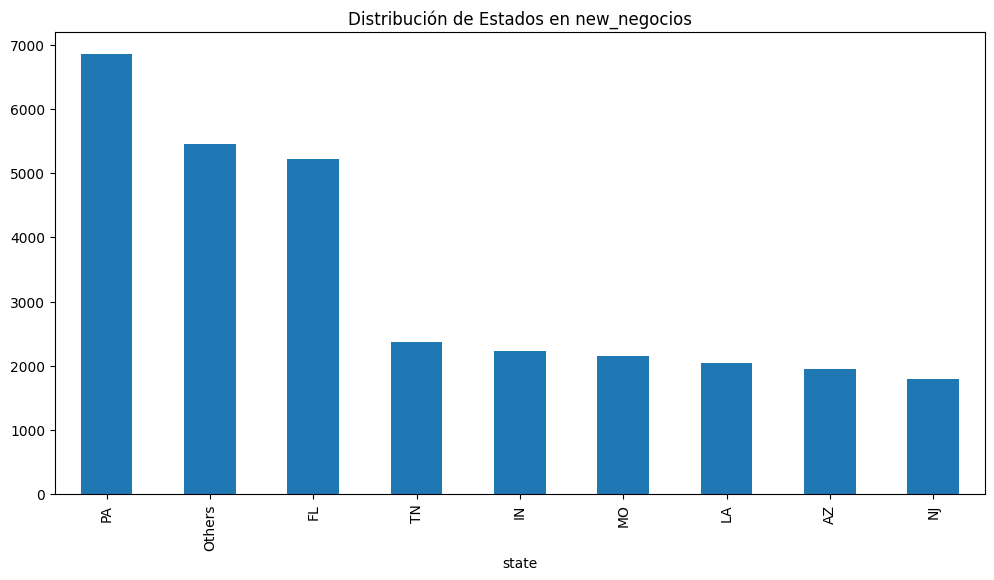

In [337]:
umbral = state_counts.mean()

# Paso 3: crear una nueva columna donde los estados raros se etiquetan como 'Others'
new_negocios['state'] = new_negocios['state'].apply(lambda x: x if state_counts[x] >= umbral else 'Others')
new_negocios['state'].value_counts().plot(kind='bar', figsize=(12, 6), title='Distribución de Estados en new_negocios')

In [338]:
from sklearn.preprocessing import OneHotEncoder

# Crear el codificador
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Aplicar sobre la columna 'state'
state_onehot = encoder.fit_transform(new_negocios[['state']])

# Obtener los nombres de columnas codificadas
state_columns = encoder.get_feature_names_out(['state'])

# Crear DataFrame con los vectores
state_vector_df = pd.DataFrame(state_onehot, columns=state_columns, index=new_negocios.index)

# (opcional) Unirlo al dataset original
new_negocios = pd.concat([new_negocios, state_vector_df], axis=1)

In [339]:
new_negocios = new_negocios.drop(columns=["state"])

In [340]:
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,attributes,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
22953,sU2mvdxCe7kTaLsNLIqmbw,Philadelphia,1.5,14,True,"{'RestaurantsTakeOut': 'True', 'Caters': 'Fals...","Restaurants, Chicken Wings, Pizza, Italian, Fa...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3752,DB36BjmWWPkWqESu9tjIaQ,Newark,3.0,50,True,"{'Alcohol': ""u'full_bar'"", 'Caters': 'True', '...","Pizza, Restaurants, Italian",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5118,zCVAy9VuyMjKoL7Wb9xgSg,Glenside,3.0,29,True,"{'GoodForKids': 'True', 'BikeParking': 'True',...","Mini Golf, Active Life",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23607,JuiFuyPw2yjWiPpi3HXJ0Q,Plant City,2.0,20,True,"{'GoodForKids': 'True', 'Ambience': ""{'tourist...","Restaurants, Chicken Wings, Italian, Pizza, Fa...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5233,qGsdi_PFuqwzN8RqzeWq_w,Nashville,3.5,678,True,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Nightlife, Piano Bars, Cocktail Bars, American...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [341]:
scaler = StandardScaler()

new_negocios['review_count'] = scaler.fit_transform(new_negocios[['review_count']])
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,attributes,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
10068,gL8rqcYrygR9_fybD4QThQ,Tucson,4.5,-0.042556,True,{'GoodForKids': 'True'},"Education, Arts & Entertainment, Stadiums & Ar...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8430,RxgUFGyeB7b2GxADvwyTGA,Saint Louis,4.5,-0.232659,True,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Massage Therapy, Health & Medical, Massage, Ph...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21377,blmmC5O_9fWK0cQ2hjGXWQ,Clearwater,3.5,-0.303948,True,NaN,"Car Dealers, Automotive",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9015,a0X8BAm9-HhecZBoTElF0A,Tucson,3.5,-0.296027,False,"{'RestaurantsGoodForGroups': 'True', 'Business...","Restaurants, Food, Salad, Sandwiches, Juice Ba...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23688,akYOGuv0J6mtM1n7ogE4-A,Palm Harbor,3.5,0.472306,False,"{'BYOBCorkage': ""'yes_free'"", 'RestaurantsTake...","Vegetarian, Buffets, Restaurants, Soup, Salad",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [342]:
new_negocios['categories'].value_counts()

categories
Beauty & Spas, Nail Salons                                                                                                                       217
Restaurants, Pizza                                                                                                                               181
Nail Salons, Beauty & Spas                                                                                                                       178
Chinese, Restaurants                                                                                                                             157
Restaurants, Mexican                                                                                                                             155
                                                                                                                                                ... 
American (Traditional), American (New), Hot Dogs, Burgers, Restaurants                         

In [343]:
def clasificar_categoria(categorias_str):
    categorias_str = str(categorias_str).lower()  # Por si hay NaNs o capitalización distinta

    if any(x in categorias_str for x in ['restaurant', 'food', 'pizza', 'mexican', 'chinese', 'japanese', 'sushi', 'ramen']):
        return 'Restaurante'
    elif any(x in categorias_str for x in ['fast food', 'burgers', 'hot dogs']):
        return 'Comida rápida'
    elif any(x in categorias_str for x in ['nail', 'beauty', 'spa', 'hair', 'salon']):
        return 'Belleza'
    elif any(x in categorias_str for x in ['shopping', 'fashion', 'clothing']):
        return 'Compras'
    elif any(x in categorias_str for x in ['hotel', 'travel', 'campgrounds']):
        return 'Hotelería'
    elif any(x in categorias_str for x in ['cleaning', 'services', 'laundry']):
        return 'Servicios'
    else:
        return 'Otros'
    
new_negocios['categories'] = new_negocios['categories'].apply(clasificar_categoria)
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,attributes,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
18978,-kVGt2QRNtBoZMvKeIjVug,Avon,2.5,-0.296027,False,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",Restaurante,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7661,j9PRj8cG-BIGOrROhzo54Q,Saint Petersburg,3.5,-0.296027,True,"{'BusinessParking': ""{'garage': False, 'street...",Compras,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16510,gfIj5FvIejEiex4WV04wIQ,Wilmington,3.5,1.224797,True,"{'RestaurantsReservations': 'True', 'OutdoorSe...",Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14247,UmtGDYiva0bukKDWLQRdaQ,Philadelphia,1.5,-0.058398,True,{'BusinessAcceptsCreditCards': 'True'},Otros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25506,5i0DSAHnQUkNe_m2jLPRGw,Carmel,3.5,-0.098003,True,NaN,Servicios,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [344]:
new_negocios['attributes'].value_counts()

attributes
{'BusinessAcceptsCreditCards': 'True'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1884
{'ByAppointmentOnly': 'True'}                                                                                                                

Complicado de primeras

In [345]:
new_negocios = new_negocios.drop(columns=["attributes"])
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
2219,vhE94NRER_4utAtbryLOiQ,Philadelphia,3.5,-0.193054,True,Otros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28425,OM7W1kCHvhvThZrKRnA1PA,New Orleans,4.5,2.341653,True,Hotelería,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14672,qAltKw1eFbee8rylmXuX9w,Reno,3.5,-0.193054,True,Belleza,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23977,t1H2xPVsbTRu48bZ5TgItw,Bala Cynwyd,2.0,0.448543,True,Otros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26606,EPhOng28sdlL-xIPwWRzAg,Kenner,5.0,-0.240580,False,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [346]:
value = new_negocios['city'].value_counts()
value

city
Philadelphia        2938
Tucson              1817
Tampa               1779
Indianapolis        1500
Nashville           1369
                    ... 
S.Pasadena             1
Lake Saint Louis       1
Marlborough            1
Meridan                1
East Nashville         1
Name: count, Length: 776, dtype: int64

Complicado de primeras

In [347]:
new_negocios = new_negocios.drop(columns=["city"])
new_negocios.sample(5)

,business_id,stars,review_count,is_open,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
12838,Taz6NSxODzkOe3Mknsh8XQ,4.0,-0.311869,True,Otros,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4325,PwbeSKSCBnqXJlAxEaUrnA,3.0,5.803112,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12219,u9qleFMXe5NwNBN4aMHYRw,2.5,-0.264343,False,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24909,Hr9cu0ZtbwKSyBmzjcNQOA,4.0,-0.240580,True,Otros,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16732,vSeqFqyLIxBeKNAbAQzmFg,5.0,-0.288106,True,Otros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [348]:
# import ast

# # Asegurarse que NaN no exploten
# def parse_dict(attr):
#     try:
#         return ast.literal_eval(attr)
#     except:
#         return {}

# new_negocios['attributes_dict'] = new_negocios['attributes'].apply(parse_dict)
# new_negocios.sample(5)

In [349]:
# def extraer_atributos_principales(attr_dict):
#     result = {}
#     keys_interes = [
#         'BusinessAcceptsCreditCards',
#         'ByAppointmentOnly',
#         'RestaurantsPriceRange2',
#         'WiFi',
#         'Alcohol',
#         'HasTV',
#         'BikeParking',
#         'RestaurantsDelivery',
#         'RestaurantsTakeOut',
#         'RestaurantsReservations',
#         'GoodForKids',
#     ]

#     for key in keys_interes:
#         valor = attr_dict.get(key, None)
#         if isinstance(valor, str):
#             valor = valor.strip().strip("u'").strip("'").strip('"')  # limpiar unicode raro
#         result[key] = valor
#     return pd.Series(result)


# df_atributos = new_negocios['attributes_dict'].apply(extraer_atributos_principales)
# new_negocios = pd.concat([new_negocios, df_atributos], axis=1) 
# new_negocios.sample(5)

In [350]:
train_reviews.shape, new_usuarios.shape, new_negocios.shape

((967784, 9), (699619, 19), (30069, 14))

## Cosas

In [357]:
test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414765 entries, 0 to 414764
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    414765 non-null  object
 1   user_id      414765 non-null  object
 2   business_id  414765 non-null  object
 3   useful       414765 non-null  int64 
 4   funny        414765 non-null  int64 
 5   cool         414765 non-null  int64 
 6   text         414765 non-null  object
 7   date         414765 non-null  object
dtypes: int64(3), object(5)
memory usage: 25.3+ MB


In [358]:
test_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [351]:
# Unir datasets: primero, fusionar train_reviews con usuarios
train = pd.merge(train_reviews, new_usuarios, on="user_id", how="left", suffixes=("", "_user"))

# Unir con negocios
train = pd.merge(train, new_negocios, on="business_id", how="left", suffixes=("", "_biz"))

train.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_count,yelping_since,useful_user,funny_user,cool_user,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,stars_biz,review_count_biz,is_open,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
0,ZZO43qKB-s65zplC8RfJqw,-1BSu2dt_rOAqllw9ZDXtA,smkZq4G1AOm4V6p3id5sww,5.0,0,0,0,Fantastic fresh food. The greek salad is amazi...,2016-09-30 15:49:32,-0.230941,2015.0,-0.070630,-0.046773,-0.053261,-0.092248,4.08,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.028437,-0.026934,-0.038728,-0.038728,-0.042674,-0.016644,4.5,0.773303,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,vojXOF_VOgvuKD95gCO8_Q,xpe178ng_gj5X6HgqtOing,96_c_7twb7hYRZ9HHrq01g,1.0,2,0,1,Been a patient at Largo Med/Diagnostic Clinic ...,2020-12-09 14:39:51,-0.050509,2017.0,-0.040699,-0.049962,-0.050997,-0.092248,2.89,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.028437,-0.032377,-0.038728,-0.038728,-0.042674,-0.016644,2.5,-0.177212,True,Otros,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,KwxdbiseRlIRNzpgvyjY0Q,axbaerf2Fk92OB4b9_peVA,e0AYjKfSF0DL-5C1CpOq6Q,4.0,0,0,0,The location is convenient to my campus so I d...,2013-09-04 16:19:51,-0.271949,2013.0,-0.046686,-0.041988,-0.050997,-0.092248,3.75,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.018193,-0.032377,-0.038728,-0.038728,-0.042674,-0.016644,2.5,-0.296027,True,Compras,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3mwoBcTy-2gMh0L91uaIeA,_GOiybb0rImYKJfwyxEaGg,vF-uptiQ34pVLHJKzPHUlA,5.0,0,0,0,I agree with all the other compliments posted ...,2019-03-02 12:24:14,0.146327,2015.0,-0.041697,-0.037203,-0.043071,-0.057150,3.79,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.028437,-0.032377,-0.031667,-0.031667,-0.042674,-0.016644,4.5,0.226757,False,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,XfWf7XsBWs3kYyYq7Ns1ZQ,ojWKg3B5pH3ncAsxun3kUw,X28XK71RuEXPapeyUOwNzg,5.0,10,4,7,"Wanting to help out the local economy, I thoug...",2020-04-23 18:26:29,1.138707,2017.0,0.110951,-0.006900,0.097330,0.118344,4.20,0.004509,0.023091,0.027257,-0.013422,-0.007925,0.022782,-0.005162,0.003635,0.003635,-0.001066,0.003522,4.0,-0.105924,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [352]:
train.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'review_count', 'yelping_since', 'useful_user',
       'funny_user', 'cool_user', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos', 'stars_biz', 'review_count_biz', 'is_open',
       'categories', 'state_AZ', 'state_FL', 'state_IN', 'state_LA',
       'state_MO', 'state_NJ', 'state_Others', 'state_PA', 'state_TN'],
      dtype='object')

In [353]:
train.isnull().sum()

review_id             0
user_id               0
business_id           0
stars                 0
useful                0
funny                 0
cool                  0
text                  0
date                  0
review_count          1
yelping_since         1
useful_user           1
funny_user            1
cool_user             1
fans                  1
average_stars         1
compliment_hot        1
compliment_more       1
compliment_profile    1
compliment_cute       1
compliment_list       1
compliment_note       1
compliment_plain      1
compliment_cool       1
compliment_funny      1
compliment_writer     1
compliment_photos     1
stars_biz             0
review_count_biz      0
is_open               0
categories            0
state_AZ              0
state_FL              0
state_IN              0
state_LA              0
state_MO              0
state_NJ              0
state_Others          0
state_PA              0
state_TN              0
dtype: int64

In [354]:
train["categories"].value_counts()

categories
Restaurante    707533
Otros           71476
Belleza         61412
Servicios       53595
Compras         48055
Hotelería       25713
Name: count, dtype: int64

In [355]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           967784 non-null  object 
 1   user_id             967784 non-null  object 
 2   business_id         967784 non-null  object 
 3   stars               967784 non-null  float64
 4   useful              967784 non-null  int64  
 5   funny               967784 non-null  int64  
 6   cool                967784 non-null  int64  
 7   text                967784 non-null  object 
 8   date                967784 non-null  object 
 9   review_count        967783 non-null  float64
 10  yelping_since       967783 non-null  float64
 11  useful_user         967783 non-null  float64
 12  funny_user          967783 non-null  float64
 13  cool_user           967783 non-null  float64
 14  fans                967783 non-null  float64
 15  average_stars       967783 non-nul

In [356]:
train.describe()

,stars,useful,funny,cool,review_count,yelping_since,useful_user,funny_user,cool_user,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,stars_biz,review_count_biz,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
count,967784.000000,967784.000000,967784.000000,967784.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967783.000000,967784.000000,967784.000000,967784.000000,967784.000000,967784.000000,967784.000000,967784.000000,967784.000000,967784.000000,967784.000000,967784.000000
mean,3.759882,1.189631,0.333222,0.496088,0.709272,2013.312941,0.350734,0.230979,0.276765,0.373318,3.745956,0.122140,0.089049,0.048053,0.039025,0.030863,0.134148,0.202091,0.172580,0.172580,0.186646,0.068723,3.763155,2.823578,0.061434,0.157140,0.066115,0.118598,0.070709,0.037565,0.167747,0.233505,0.087187
std,1.479482,3.041815,2.216878,1.971390,3.007327,3.065397,3.229730,3.173152,3.132796,3.245793,0.864806,1.785315,1.375889,1.421835,1.155801,1.148335,1.615742,2.590485,2.073856,2.073856,2.175431,1.493939,0.764222,6.880328,0.240125,0.363933,0.248483,0.323315,0.256338,0.190142,0.373642,0.423061,0.282109
min,1.000000,-1.000000,0.000000,0.000000,-0.304755,2004.000000,-0.077614,-0.051557,-0.053261,-0.092248,1.000000,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.028437,-0.032377,-0.038728,-0.038728,-0.042674,-0.016644,1.000000,-0.311869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,-0.247344,2011.000000,-0.074621,-0.051557,-0.053261,-0.092248,3.390000,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.028437,-0.032377,-0.038728,-0.038728,-0.042674,-0.016644,3.500000,-0.018793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,-0.107919,2013.000000,-0.059656,-0.046773,-0.048732,-0.092248,3.880000,-0.031897,-0.026385,-0.014603,-0.013422,-0.007925,-0.028437,-0.032377,-0.038728,-0.038728,-0.042674,-0.016644,4.000000,0.709935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000,0.482588,2015.000000,0.031135,-0.013280,-0.009103,0.048147,4.290000,-0.022795,0.023091,-0.014603,-0.013422,-0.007925,0.002294,-0.016048,-0.017546,-0.017546,-0.001066,-0.009922,4.500000,2.555519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,392.000000,375.000000,205.000000,142.999841,2022.000000,205.743542,296.318322,226.262214,438.536883,5.000000,234.640740,667.959722,593.567457,747.993545,771.008677,604.666635,550.222248,352.747445,352.747445,331.454110,555.426489,5.000000,59.594343,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
